In [31]:
import pandas as pd
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

import prepare
import acquire

import matplotlib.pyplot as plt
import seaborn as sns

1. Spam Data
    1. Load the spam data set.
    2. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    3. Is there any overlap in the bigrams for the spam data and the ham data?
    4. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.
    5. Bonus: plot document length information of spam vs. ham. Does there appear to be a difference?
2. Explore the blog articles using the techniques discussed in the exploration lesson.
3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

# EXERCISE 1.A
### Load the spam data set.

### Acquire Spam
Loading the Spam Dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Prepare Spam

In [3]:
df['text_cleaned'] = df.text.apply(prepare.basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...


In [4]:
df['text_tokenized'] = df.text_cleaned.apply(prepare.tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...


In [5]:
df['text_lemmatized'] = df.text_tokenized.apply(prepare.lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...


In [6]:
num_stopwords_removed = []

In [7]:
df['text_filtered'] = df.text_lemmatized.apply(prepare.remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though


In [15]:
df['num_stopwords_removed'] = df.apply(lambda row: len(row['text_lemmatized'].split()) - len(row['text_filtered'].split()), axis=1)

In [16]:
df

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,4
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,7
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,7
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u i12750 pound priz...,10
5568,ham,Will ï¿½_ b going to esplanade fr home?,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,i12 b going esplanade fr home,2
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,pity was in mood for that soany other suggestions,pity wa in mood for that soany other suggestion,pity wa mood soany suggestion,4
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like i '...,the guy did some bitching but i acted like i '...,guy bitching acted like ' interested buying so...,14


In [20]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
df = pd.concat([df, pd.DataFrame({'words': words})], axis = 1)
df

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,4,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,0,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,7,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,2,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,7,"[nahthink, go, usf, life, around, though]"
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u i12750 pound priz...,10,"[2nd, time, triedcontactu, i12750, pound, priz..."
5568,ham,Will ï¿½_ b going to esplanade fr home?,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,i12 b going esplanade fr home,2,"[i12going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,pity was in mood for that soany other suggestions,pity wa in mood for that soany other suggestion,pity wa mood soany suggestion,4,"[pity, wa, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like i '...,the guy did some bitching but i acted like i '...,guy bitching acted like ' interested buying so...,14,"[guy, bitching, acted, likeinterested, buying,..."


In [24]:
doc_length = [len(wordlist) for wordlist in df.words]

In [26]:
df['doc_length'] = doc_length
df = df[df.doc_length != 0]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,4,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,0,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,7,"[free, entrywkly, comp, win, fa, cup, final, t...",20
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,2,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,7,"[nahthink, go, usf, life, around, though]",6


In [27]:
# Creating a single string of all words in the df
ham_words = ' '.join(df[df.label == 'ham'].text_filtered)
spam_words = ' '.join(df[df.label == 'spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

# Removing single character words
ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

# Creating series containing frequency of words in the df
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [28]:
# Creating a dataframe containing the words and their frequency in each category
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int)))

In [29]:
word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


# EXERCISE 1.B
### Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [32]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,4,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,0,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,7,"[free, entrywkly, comp, win, fa, cup, final, t...",20,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,2,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,7,"[nahthink, go, usf, life, around, though]",6,"[(nahthink, go), (go, usf), (usf, life), (life..."


In [49]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts()
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts()

In [50]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

spam_data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
spam_data

{'please call': 43,
 'customer service': 27,
 'guaranteed call': 23,
 'po box': 23,
 'prize guaranteed': 22,
 'i121000 cash': 20,
 'send stop': 19,
 'every week': 19,
 'urgent mobile': 18,
 'land line': 18,
 'await collection': 18,
 'valid 12hrs': 17,
 'sae tc': 16,
 'account statement': 16,
 'claim call': 16,
 'call customer': 15,
 'identifier code': 15,
 'call mobileupd8': 15,
 'selected receive': 15,
 'call 08000930705': 15,
 'reply call': 15,
 'week txt': 14,
 'ur awarded': 14,
 '2nd attempt': 14,
 'line claim': 14,
 'tell ur': 14,
 'double min': 13,
 'draw show': 13,
 '2003 account': 13,
 'txt nokia': 13,
 'private 2003': 13,
 'show 800': 12,
 'network min': 12,
 'claim ur': 12,
 'txt word': 12,
 'per min': 12,
 'i122000 prize': 12,
 'free text': 12,
 '800 unredeemed': 12,
 'caller prize': 12,
 'guaranteed i121000': 12,
 'camcorder reply': 12,
 'claim code': 12,
 'half price': 12,
 'point call': 12,
 'bonus caller': 11,
 'free call': 11,
 'chance win': 11,
 'mobile number': 11,
 '

In [51]:
ham_data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
ham_data

{'let know': 33,
 'sorrycall later': 33,
 'good morning': 30,
 'new year': 26,
 'pls send': 22,
 'take care': 21,
 'good night': 19,
 'hi hi': 18,
 'great day': 17,
 'ltgt min': 16,
 'last night': 15,
 'happy new': 15,
 'dont know': 15,
 'ok lor': 14,
 'pick phone': 13,
 'like ltgt': 13,
 'send message': 12,
 'phone right': 12,
 'right pls': 12,
 'nice day': 12,
 'want go': 12,
 'cant pick': 12,
 'happy birthday': 11,
 'good afternoon': 11,
 'good day': 11,
 'gud mrng': 11,
 'gud ni8': 11,
 'hi darlin': 10,
 'hope good': 10,
 'across sea': 10,
 'last week': 10,
 'go day': 10,
 'want come': 10,
 'get back': 10,
 'come home': 9,
 'ltgt th': 9,
 'thats cool': 9,
 'next week': 9,
 'come back': 9,
 'one day': 8,
 'please call': 8,
 'call later': 8,
 'morning dear': 8,
 'watching tv': 8,
 'feel like': 8,
 'ltgt minute': 7,
 'keep touch': 7,
 'today birthday': 7,
 'ur smile': 7,
 'ill get': 7,
 'later tonight': 7,
 'ur friend': 7,
 'gud nyt': 7,
 'come tomorrow': 7,
 'going sleep': 7,
 'ur ho

(-0.5, 799.5, 399.5, -0.5)

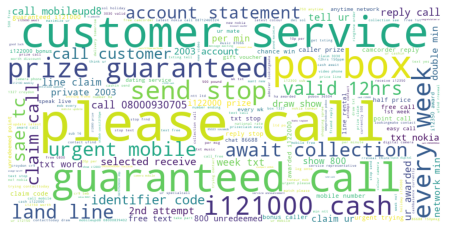

In [52]:
spam_img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(spam_data)
plt.figure(figsize=(8, 4))
plt.imshow(spam_img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

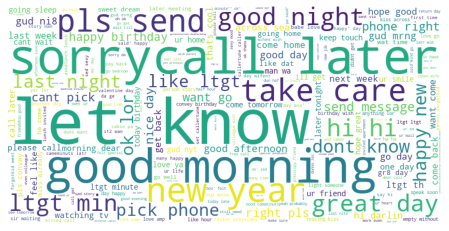

In [53]:
ham_img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(ham_data)
plt.figure(figsize=(8, 4))
plt.imshow(ham_img)
plt.axis('off')

# EXERCISE 1.C

### Is there any overlap in the bigrams for the spam data and the ham data?

In [54]:
overlapping_bigrams = dict()

for bigram in spam_data:
    if (bigram in ham_data) and not (bigram in overlapping_bigrams):
        overlapping_bigrams[bigram] = 1
    elif (bigram in ham_data) and (bigram in overlapping_bigrams):
        overlapping_bigrams[bigram] += 1

overlapping_bigrams

{'please call': 1,
 'customer service': 1,
 'po box': 1,
 'every week': 1,
 'tell ur': 1,
 'free call': 1,
 'mobile number': 1,
 'call free': 1,
 'think ur': 1,
 'dont miss': 1,
 'mp3 player': 1,
 'new mobile': 1,
 'unlimited text': 1,
 'get free': 1,
 'brand new': 1,
 'term condition': 1,
 'ur friend': 1,
 'call back': 1,
 'someone ha': 1,
 'call landline': 1,
 'reference number': 1,
 'please go': 1,
 'tonight want': 1,
 'pls call': 1,
 'need help': 1,
 'call call': 1,
 'hope enjoyed': 1,
 'well done': 1,
 'great new': 1,
 'hi babe': 1,
 'msg reply': 1,
 'enjoy one': 1,
 'girl waiting': 1,
 'new year': 1,
 'day send': 1,
 'free message': 1,
 'missed call': 1,
 'call cost': 1,
 'message call': 1,
 'text word': 1,
 'valentine day': 1,
 'one like': 1,
 'go another': 1,
 'get ur': 1,
 'text back': 1,
 'live call': 1,
 'sent text': 1,
 'little time': 1,
 'ha credited': 1,
 'last week': 1,
 'tell look': 1,
 'next week': 1,
 'sim card': 1,
 'come take': 1,
 'send free': 1,
 'would like': 1,


# EXERCISE 1.D

### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [55]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts()
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts()

In [62]:
ham_trigrams

(happy, new, year)            13
(phone, right, pls)           12
(right, pls, send)            12
(cant, pick, phone)           12
(pick, phone, right)          12
                              ..
(lei, i12going, esplanade)     1
(lol, ok, forgiven)            1
(go, jazz, yogasana)           1
(one, day, crab)               1
(hr, tomo, lol)                1
Length: 30722, dtype: int64

In [63]:
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(2003, account, statement)             13
(reply, call, 08000930705)             13
                                       ..
(8714714, ur, awarded)                  1
(reply, win, 83355)                     1
(selection, hot, downloads)             1
(ymca, getzedcouk, pobox365o4w45wq)     1
(08448714184, stoptxt, stop)            1
Length: 7604, dtype: int64

In [59]:
tri_spam_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
tri_spam_data

{'prize guaranteed call': 21,
 'call customer service': 15,
 'land line claim': 14,
 '2003 account statement': 13,
 'reply call 08000930705': 13,
 'private 2003 account': 13,
 'show 800 unredeemed': 12,
 'guaranteed i121000 cash': 12,
 'camcorder reply call': 12,
 'anytime network min': 11,
 'bonus caller prize': 11,
 'every week txt': 11,
 'customer service representative': 10,
 'i122000 bonus caller': 10,
 'please call customer': 10,
 'cash await collection': 10,
 'urgent mobile number': 9,
 'unredeemed point call': 9,
 '750 anytime network': 9,
 'free 1st week': 9,
 'mobile number ha': 9,
 'toneur mob every': 9,
 'mob every week': 9,
 'i122000 prize guaranteed': 9,
 'trying contacttoday draw': 9,
 'contacttoday draw show': 9,
 '800 unredeemed point': 9,
 'draw txt music': 9,
 'txt music 87066': 9,
 'lookingmake contact ufind': 8,
 'collection sae tc': 8,
 'every wk txt': 8,
 'claim 3030 valid': 8,
 'call mobileupd8 08000839402': 8,
 'ufind rreveal think': 8,
 'contact ufind rreveal'

In [64]:
tri_ham_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
tri_ham_data

{'happy new year': 13,
 'phone right pls': 12,
 'right pls send': 12,
 'cant pick phone': 12,
 'pick phone right': 12,
 'hi hi hi': 11,
 'pls send message': 10,
 'good morning dear': 7,
 'pls convey birthday': 6,
 'kiss across sea': 6,
 'convey birthday wish': 6,
 "week wa' day": 5,
 'cameminuts latr wid': 5,
 "day bos' felt": 5,
 'forgotkid went work': 5,
 "cabin pa said'": 5,
 'mood cameminuts latr': 5,
 'sexy mood cameminuts': 5,
 'love go day': 5,
 "bos' felt special": 5,
 "bedroom minute'' ok'": 5,
 'parent forgotkid went': 5,
 "go bedroom minute''": 5,
 "last week wa'": 5,
 "ok' sed sexy": 5,
 'sed sexy mood': 5,
 "said' happy' day": 5,
 'caller presscopy friend': 5,
 'day wifent wish': 5,
 'lunch invited apartment': 5,
 'sorrycall later meeting': 5,
 'sad story man': 5,
 'felt special askdlunch': 5,
 'wifent wish parent': 5,
 "happy' day bos'": 5,
 'wid caken wife': 5,
 "wa' day wifent": 5,
 'callertune caller presscopy': 5,
 'work even colleague': 5,
 'askdlunch lunch invited':

(-0.5, 799.5, 399.5, -0.5)

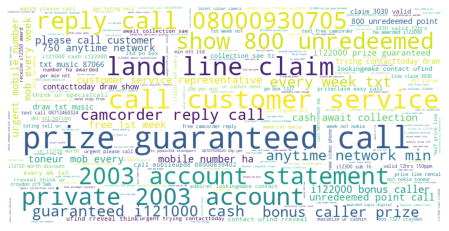

In [65]:
tri_spam_img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(tri_spam_data)
plt.figure(figsize=(8, 4))
plt.imshow(tri_spam_img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

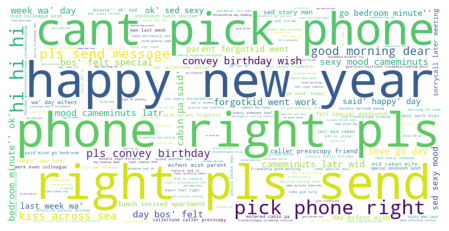

In [66]:
tri_ham_img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(tri_ham_data)
plt.figure(figsize=(8, 4))
plt.imshow(tri_ham_img)
plt.axis('off')

In [67]:
overlapping_trigrams = dict()

for trigram in tri_spam_data:
    if (trigram in tri_ham_data) and not (trigram in overlapping_trigrams):
        overlapping_trigrams[trigram] = 1
    elif (trigram in tri_ham_data) and (trigram in overlapping_trigrams):
        overlapping_trigrams[trigram] += 1

overlapping_trigrams

{'please call back': 1,
 'new year eve': 1,
 'called left message': 1,
 'sorry missed call': 1}

# EXERCISE 1.E (Bonus)
### Plot document length information of spam vs. ham. Does there appear to be a difference?

Text(0.5, 1.0, 'Distribution of document lengths of messages labeled "ham"')

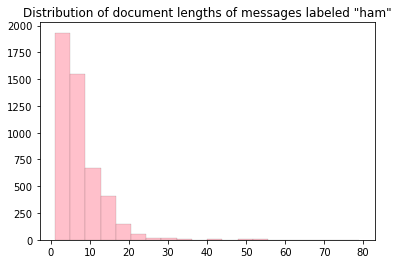

In [93]:
plt.hist(df[df.label == 'ham'].doc_length, bins = 20, edgecolor='black', linewidth=.1, color = 'pink')
plt.title('Distribution of document lengths of messages labeled "ham"')

Text(0.5, 1.0, 'Distribution of document lengths of messages labeled "spam"')

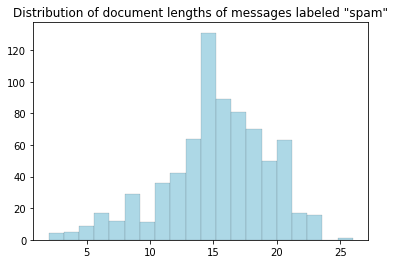

In [94]:
plt.hist(df[df.label == 'spam'].doc_length, bins = 20, edgecolor='black', linewidth=.1, color = 'lightblue')
plt.title('Distribution of document lengths of messages labeled "spam"')

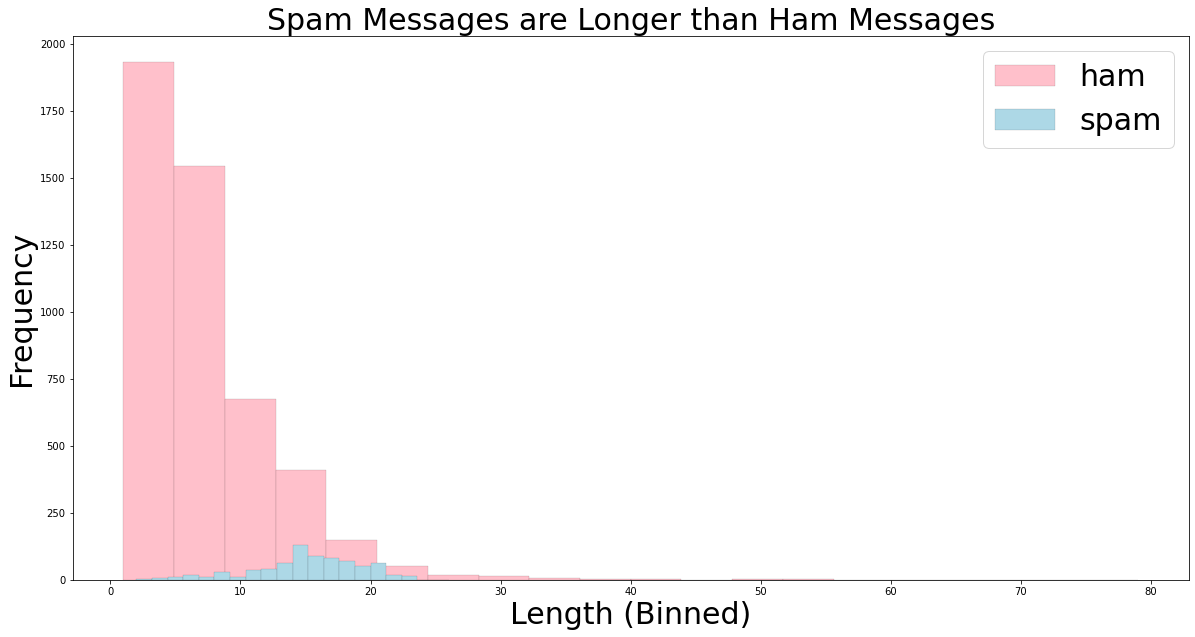

In [111]:
plt.figure(figsize=(20,10))
plt.hist(df[df.label == 'ham'].doc_length, bins = 20, edgecolor='black', linewidth=.1, color = 'pink', label ='ham')
plt.hist(df[df.label == 'spam'].doc_length, bins = 20, edgecolor='black', linewidth=.1, color = 'lightblue', label = 'spam')
plt.title('Spam Messages are Longer than Ham Messages', fontdict = {'fontsize' : 30})
plt.xlabel('Length (Binned)', fontdict = {'fontsize' : 30})
plt.ylabel('Frequency', fontdict = {'fontsize' : 30})
plt.legend(prop={'size': 30})

In [77]:
df[df.label == 'spam'].doc_length.describe()

count    747.000000
mean      15.139224
std        4.116520
min        2.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       26.000000
Name: doc_length, dtype: float64

In [78]:
df[df.label == 'ham'].doc_length.describe()

count    4820.000000
mean        7.029876
std         5.535182
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        79.000000
Name: doc_length, dtype: float64

In [79]:
df[(df.label=='spam') & (df.doc_length == 2)]

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words,doc_length,bigrams
3740,spam,2/2 146tf150p,22 146tf150p,22 146tf150p,22 146tf150p,22 146tf150p,0,"[22, 146tf150p]",2,"[(22, 146tf150p)]"
3979,spam,ringtoneking 84484,ringtoneking 84484,ringtoneking 84484,ringtoneking 84484,ringtoneking 84484,0,"[ringtoneking, 84484]",2,"[(ringtoneking, 84484)]"


In [82]:
df[(df.label=='ham') & (df.doc_length == 1)]

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words,doc_length,bigrams
43,ham,WHO ARE YOU SEEING?,who are you seeing,who are you seeing,who are you seeing,seeing,3,[seeing],1,[]
127,ham,Are you there in room.,are you there in room,are you there in room,are you there in room,room,4,[room],1,[]
130,ham,I'm home.,i'm home,i ' m home,i ' m home,' home,2,[home],1,[]
181,ham,Lol no. U can trust me.,lol no u can trust me,lol no u can trust me,lol no u can trust me,lol u trust,3,[loltrust],1,[]
252,ham,What you doing?how are you?,what you doinghow are you,what you doinghow are you,what you doinghow are you,doinghow,4,[doinghow],1,[]
...,...,...,...,...,...,...,...,...,...,...
5357,ham,Ok,ok,ok,ok,ok,0,[ok],1,[]
5408,ham,... Are you in the pub?,are you in the pub,are you in the pub,are you in the pub,pub,4,[pub],1,[]
5418,ham,So how are you really. What are you up to. How...,so how are you really what are you up to how's...,so how are you really what are you up to how '...,so how are you really what are you up to how '...,really ' master,15,[reallymaster],1,[]
5471,ham,Yup,yup,yup,yup,yup,0,[yup],1,[]


In [92]:
print(df[df.text_filtered == "really ' master"].text[5418])

So how are you really. What are you up to. How's the masters. And so on.


# EXERCISE 2
### Explore the blog articles using the techniques discussed in the exploration lesson.

In [112]:
urls = acquire.get_all_urls()

In [113]:
blog = acquire.get_blog_articles(urls)

In [114]:
blog

,title,content
0,How to Succeed in a Coding Bootcamp,We held a virtual event called “How to Succeed...
1,Announcing: The Annie Easley Scholarship to Su...,We have an exciting announcement! We’re launch...
2,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...
3,Codeup on Inc. 5000 Fastest Growing Private Co...,We’re excited to announce a huge Codeup achiev...
4,Your Education is an Investment,You have many options regarding educational ro...
5,What is the Transition into Data Science Like?,Alumni Katy Salts and Brandi Reger joined us a...
6,How Codeup Alumni Helped Dallas Youth Fight CO...,Three of our Web Development alumni from Dalla...
7,What is Machine Learning?,"There’s a lot we can learn about machines, and..."
8,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...
9,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will..."


In [116]:
print(blog.iloc[0].content)

We held a virtual event called “How to Succeed in a Coding Bootcamp” featuring our Dallas-based Full-Stack Web Development instructors, Douglas Hirsh and Fernando Mendoza. To start our incoming students off on the right foot, we wanted to hear what advice they have to optimize a coding bootcamp experience. Check out their top tips below!
Practice
“Practical information and practical skills are going to be acquired by practicing every single day.” – Fernando
Practice is an essential part of learning something new. You could watch people bake all day long, and still not be any better of a baker yourself. That’s why our students spend more time actually writing code than listening to lectures. You’ll practice alone, with your cohort, and with instructor guidance. Through this practice, you will change the way you think and approach problems. The instructors agreed that practicing on your own through fun side projects, like creating a program to organize your baking recipes, sets the most 

In [117]:
blog = prepare.prep_article_data(blog, 'content')
blog

,title,content,stemmed,lemmatized,clean
0,How to Succeed in a Coding Bootcamp,We held a virtual event called “How to Succeed...,we held a virtual event call how to succeed in...,we held a virtual event called how to succeed ...,held virtual event called succeed coding bootc...
1,Announcing: The Annie Easley Scholarship to Su...,We have an exciting announcement! We’re launch...,we have an excit announc were launch a new sch...,we have an exciting announcement were launchin...,exciting announcement launching new scholarshi...
2,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...
3,Codeup on Inc. 5000 Fastest Growing Private Co...,We’re excited to announce a huge Codeup achiev...,were excit to announc a huge codeup achiev inc...,were excited to announce a huge codeup achieve...,excited announce huge codeup achievement inc m...
4,Your Education is an Investment,You have many options regarding educational ro...,you have mani option regard educ rout to your ...,you have many option regarding educational rou...,many option regarding educational route desire...
5,What is the Transition into Data Science Like?,Alumni Katy Salts and Brandi Reger joined us a...,alumni kati salt and brandi reger join us at a...,alumnus katy salt and brandi reger joined u at...,alumnus katy salt brandi reger joined u public...
6,How Codeup Alumni Helped Dallas Youth Fight CO...,Three of our Web Development alumni from Dalla...,three of our web develop alumni from dalla rex...,three of our web development alumnus from dall...,three web development alumnus dallas rex sutto...
7,What is Machine Learning?,"There’s a lot we can learn about machines, and...",there a lot we can learn about machin and ther...,there a lot we can learn about machine and the...,there lot learn machine there lot machine lear...
8,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...,imagin have a kit mail to you with all the nec...,imagine having a kit mailed to you with all th...,imagine kit mailed necessary component make co...
9,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",come into our data scienc program you will nee...,coming into our data science program you will ...,coming data science program need know math sta...
